In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [14]:
data = pd.read_csv("C:/Users/YadavKDe/Desktop/MM/AirPassengers.csv",index_col="Month",parse_dates = True)

In [15]:
data = data.dropna()
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [18]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [19]:
data.index.freq = 'MS'

In [21]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [24]:
span = 12
alpha = 2/(span+1)

In [34]:
data["EWMA12"] = data["Passengers"].ewm(alpha = alpha, adjust= False).mean()
data

,Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861
...,...,...
1960-08-01,606,494.898619
1960-09-01,508,496.914216
1960-10-01,461,491.388952


##Simple EXP Smoothing...

In [29]:
model = SimpleExpSmoothing(data["Passengers"])

In [32]:
fitted_model = model.fit(smoothing_level = alpha, optimized = False)

In [36]:
data["SES12"] = fitted_model.fittedvalues.shift(-1)

,Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861
...,...,...,...
1960-08-01,606,494.898619,494.898619
1960-09-01,508,496.914216,496.914216
1960-10-01,461,491.388952,491.388952


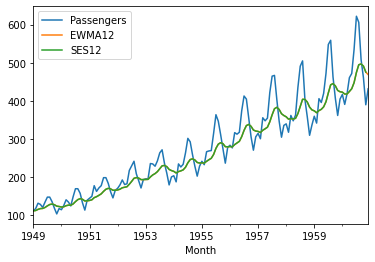

In [40]:
data.plot()

In [39]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing